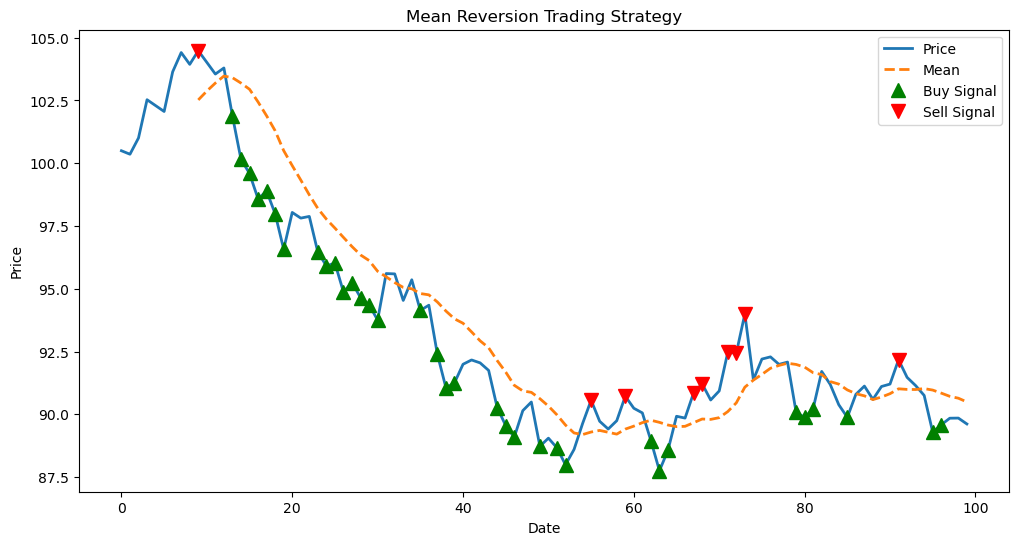

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 模拟生成价格数据
np.random.seed(42)
price_data = np.random.randn(100).cumsum() + 100

# 将价格数据转为DataFrame
df = pd.DataFrame({'Price': price_data})

# 定义均值回归策略
def mean_reversion_strategy(df, lookback_period=10, entry_threshold=1.0, exit_threshold=0.5):
    df['Mean'] = df['Price'].rolling(window=lookback_period).mean()
    df['Z-Score'] = (df['Price'] - df['Mean']) / df['Price'].rolling(window=lookback_period).std()

    # 生成交易信号
    df['Signal'] = 0
    df.loc[df['Z-Score'] > entry_threshold, 'Signal'] = -1  # 卖出信号
    df.loc[df['Z-Score'] < -entry_threshold, 'Signal'] = 1  # 买入信号
    df.loc[np.abs(df['Z-Score']) < exit_threshold, 'Signal'] = 0  # 平仓信号

    # 计算持仓
    df['Position'] = df['Signal'].shift()

    return df

# 执行策略
df = mean_reversion_strategy(df)

# 可视化交易信号和价格
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Price', linewidth=2)
plt.plot(df['Mean'], label='Mean', linestyle='--', linewidth=2)
plt.plot(df.loc[df['Signal'] == 1].index, df['Price'][df['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df.loc[df['Signal'] == -1].index, df['Price'][df['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Mean Reversion Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:
df

,Price,Mean,Z-Score,Signal,Position
0,100.496714,NaN,NaN,0,NaN
1,100.358450,NaN,NaN,0,0.0
2,101.006138,NaN,NaN,0,0.0
3,102.529168,NaN,NaN,0,0.0
4,102.295015,NaN,NaN,0,0.0
...,...,...,...,...,...
95,89.287646,90.965035,-2.279009,1,0.0
96,89.583767,90.843911,-1.470667,1,1.0
97,89.844822,90.716018,-0.963115,0,1.0
98,89.849935,90.641612,-0.837405,0,0.0
